In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# 이미지 파일 불러오기
img = Image.open('./resources/img01.png')
img = img.convert('L')
img = np.asarray(img, dtype='float32')
print(img.shape)  # (256 x 512) 이미지 행렬

min_img_top10p = min(sorted(img.reshape(-1).tolist(), reverse=True)[:13108])  # = 92
# k-sparse 이미지 행렬 만들기
# 상위 10%를 제외한 나머지 값은 0으로 대체하기
img_sparse = [pix  if pix >= min_img_top10p else 0 for pix in img.reshape(-1).tolist()]
img_sparse = np.array(img_sparse)
# 원래의 이미지 행렬로 바꿔주기
img_sparse = img_sparse.reshape(256, -1)
print(img_sparse.shape)

(256, 512)
(256, 512)


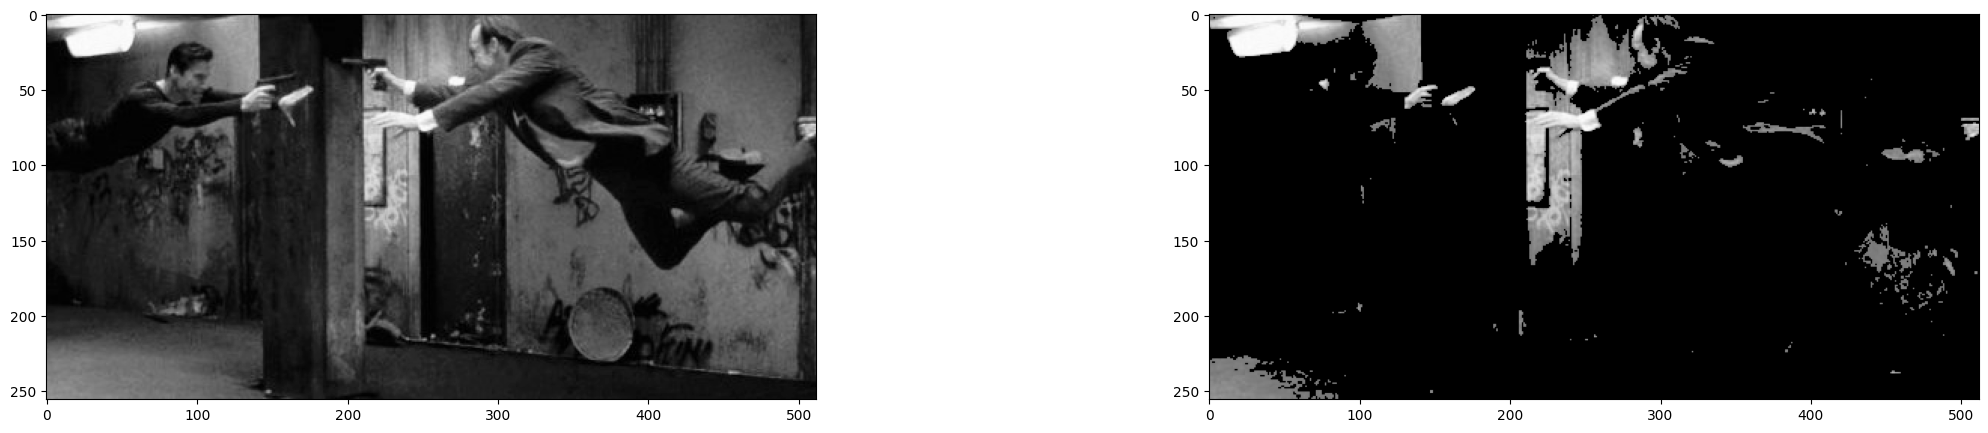

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5))
fig.subplots_adjust(hspace = .5, wspace=.5)

img_list = [img, img_sparse]
title_list = ['original', 'sparse']

for i, img in enumerate(img_list):
    axs[i].imshow(img ,cmap='Greys_r')